## Section 1: Business Understanding

### Question : What are the factors contribue to StackOverflow Satisfaction relates? 


## Section 2: Data Understanding

### Gather and Explore data set

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import WhatHappened as t2
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [3]:
# Get all numerical columns in the data frame
Num_df=df.select_dtypes(include=['float64','int'])
Num_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [4]:
# Get all categorical columns in the data frame
cat_df = df.select_dtypes(include=['object','O']) 
cat_df.shape

(19102, 147)

## Section 3: Data Preparation

### Assess Data

#### For Categorical variables selected:
StackOverflowMetaChat, StackOverflowAdsRelevant, StackOverflowJobSearch, StackOverflowCommunity
#### For Numerical variables selected:
StackOverflowSatisfaction


In [5]:
# Assess of numerical data selected
# Percentage of values missing greater than 50%?
most_missing_cols = set(Num_df.columns[Num_df.isnull().mean() > 0.5])#Provide a set of columns with more than 75% of the values missing

most_missing_cols

{'ExpectedSalary', 'HoursPerWeek', 'Salary'}

In [7]:
# # Assess of numerical data selected
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.isnull().sum()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [9]:
# Assess of numerical data selected
# Proportion of individuals in the dataset with stack overflow satisfaction reported
prop_sals = 1 - df.isnull()['StackOverflowSatisfaction'].mean()

prop_sals

0.70421945346037063

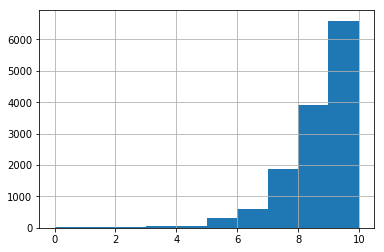

In [10]:
# Assess of numerical data selected
# Histogram distribution of the numerical data 
# Visualise the numerical data
df['StackOverflowSatisfaction'].hist()

In [11]:
# Assess of numerical data selected
# Count number of row with each unique value of variable
stackfl_vals = df.StackOverflowSatisfaction.value_counts()
stackfl_vals.reset_index()

,index,StackOverflowSatisfaction
0,8.0,3916
1,9.0,3459
2,10.0,3139
3,7.0,1858
4,6.0,588
5,5.0,301
6,4.0,71
7,3.0,58
8,2.0,34
9,1.0,16


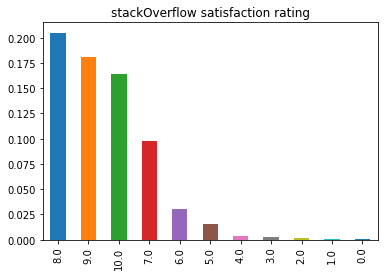

In [12]:
# Assess of numerical data selected
# Value distribution of the numerical data 
# Visualise the distribution using bar chart

(stackfl_vals/df.shape[0]).plot(kind="bar");
plt.title("stackOverflow satisfaction rating");

In [13]:
# Assess of Categorical data selected
# Extract the columns to a subset of data frame
cat_cols_lst = cat_df[['StackOverflowMetaChat','StackOverflowAdsRelevant','StackOverflowJobSearch','StackOverflowCommunity']]
cat_cols_lst.head()

,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowJobSearch,StackOverflowCommunity
0,Once or twice,Somewhat agree,Haven't done at all,Strongly agree
1,At least once each week,Disagree,Once or twice,Strongly agree
2,At least once each day,Disagree,Haven't done at all,Strongly agree
3,At least once each day,Agree,At least once each week,Strongly agree
4,NaN,NaN,NaN,NaN


In [14]:
# Assess of Categorical data selected
# Extract the questions related to each categorical data selected
set(schema[schema['Column']=='StackOverflowMetaChat']['Question'])

{'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Participated in community discussions on meta or in chat'}

In [15]:
# Assess of Categorical data selected
# Extract the questions related to each categorical data selected
set(schema[schema['Column']=='StackOverflowAdsRelevant']['Question'])

{'The ads on Stack Overflow are relevant to me'}

In [16]:
# Assess of Categorical data selected
# Extract the questions related to each categorical data selected
set(schema[schema['Column']=='StackOverflowJobSearch']['Question'])

{'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Searched for jobs'}

In [17]:
# Assess of Categorical data selected
# Extract the questions related to each categorical data selected
set(schema[schema['Column']=='StackOverflowCommunity']['Question'])

{'I feel like a member of the Stack Overflow community'}

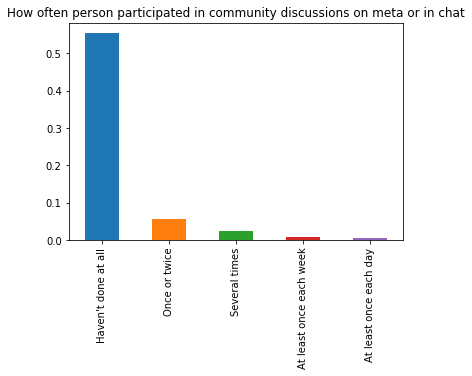

In [18]:
# Assess of Categorical data selected
# Extract the columns to a subset of data frame
#Provide a pandas series of the counts for stackOverflow MetaChat group
count_vals = df.StackOverflowMetaChat.value_counts()

# The below should be a bar chart of the proportion of the top 5 answers

(count_vals[:5]/df.shape[0]).plot(kind="bar");
plt.title("How often person participated in community discussions on meta or in chat");

## Section 3: Data Preparation

### Analyze Data using statistical methods

#### For Categorical variables selected:
StackOverflowMetaChat, StackOverflowAdsRelevant, StackOverflowJobSearch, StackOverflowCommunity
#### For Numerical variables selected:
StackOverflowSatisfaction


In [19]:
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df.groupby(['StackOverflowMetaChat']).mean()['StackOverflowSatisfaction'].sort_values().reset_index()

,StackOverflowMetaChat,StackOverflowSatisfaction
0,At least once each week,8.228758
1,Haven't done at all,8.373738
2,Once or twice,8.378182
3,Several times,8.403846
4,At least once each day,8.554348


In [20]:
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df.groupby(['StackOverflowAdsRelevant']).mean()['StackOverflowSatisfaction'].sort_values().reset_index()

,StackOverflowAdsRelevant,StackOverflowSatisfaction
0,Strongly disagree,7.883978
1,Disagree,8.163366
2,Somewhat agree,8.467336
3,Agree,8.718940
4,Strongly agree,9.132911


In [21]:
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df.groupby(['StackOverflowJobSearch']).mean()['StackOverflowSatisfaction'].sort_values().reset_index()

,StackOverflowJobSearch,StackOverflowSatisfaction
0,Haven't done at all,8.317593
1,Once or twice,8.477204
2,Several times,8.592666
3,At least once each week,8.704120
4,At least once each day,8.921569


In [22]:
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df.groupby(['StackOverflowCommunity']).mean()['StackOverflowSatisfaction'].sort_values().reset_index()

,StackOverflowCommunity,StackOverflowSatisfaction
0,Strongly disagree,7.339367
1,Disagree,8.121535
2,Somewhat agree,8.522144
3,Agree,8.734412
4,Strongly agree,9.152273


In [23]:
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df.groupby(['StackOverflowCommunity']).mean()['StackOverflowSatisfaction'].sort_values().reset_index()

,StackOverflowCommunity,StackOverflowSatisfaction
0,Strongly disagree,7.339367
1,Disagree,8.121535
2,Somewhat agree,8.522144
3,Agree,8.734412
4,Strongly agree,9.152273


In [24]:
# identify categorical and non categorical features

cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe
cat_df.shape[1]


147

## Section 4: Clean Data 

#### For Categorical variables selected:
FormalEducation, EmploymentStatus, YearsCodedJob, CompanySize
#### For Numerical variables selected:
CareerSatisfaction

In [60]:
#Pull a list of the column names of the categorical variables
df_new = df[['FormalEducation', 'EmploymentStatus', 'YearsCodedJob', 'CompanySize','StackOverflowSatisfaction','HoursPerWeek', 'ExpectedSalary', 'Salary','Respondent','CareerSatisfaction']]

# Show a header of df_new to check
print(df_new.shape)

(19102, 10)


In [61]:
df_new['Respondent'].isnull().sum()/df_new.shape[0]>.5

False

In [62]:
df_new['ExpectedSalary'].isnull().sum()/df_new.shape[0]>.5

True

In [63]:
df_new['HoursPerWeek'].isnull().sum()/df_new.shape[0]>.5

True

In [64]:
df_new['Salary'].isnull().sum()/df_new.shape[0]>.5

True

In [65]:
df_new['CareerSatisfaction'].isnull().sum()/df_new.shape[0]>.5

False

In [66]:
df_new['StackOverflowSatisfaction'].isnull().sum()/df_new.shape[0]>.5

False

In [67]:
#Putting in all together --- clean data

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no StackOverflowSatisfaction
    2. Create X as all the columns that are not the StackOverflowSatisfaction column
    3. Create y as the StackOverflowSatisfaction column
    4. Drop the HoursPerWeek, ExpectedSalary, and the Salary columns from X due to large na value
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['StackOverflowSatisfaction'], axis=0)
    y = df['StackOverflowSatisfaction']
    
    #Drop respondent and expected salary columns
    df = df.drop(['HoursPerWeek', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
 

In [68]:
#Use the function to create X and y
X, y = clean_data(df_new)

In [69]:
X.head()

,StackOverflowSatisfaction,Respondent,CareerSatisfaction,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,...,YearsCodedJob_Less than a year,CompanySize_10 to 19 employees,"CompanySize_10,000 or more employees",CompanySize_100 to 499 employees,CompanySize_20 to 99 employees,"CompanySize_5,000 to 9,999 employees",CompanySize_500 to 999 employees,CompanySize_Fewer than 10 employees,CompanySize_I don't know,CompanySize_I prefer not to answer
0,9.0,1,7.405328,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,8.0,2,7.405328,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.0,3,8.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,10.0,4,6.000000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,6.0,6,7.405328,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y.describe()

count    13452.000000
mean         8.357865
std          1.405546
min          0.000000
25%          8.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: StackOverflowSatisfaction, dtype: float64

## Section 4: Data Modeling

### Fit model

### Validate the model

In [71]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [72]:
#Predict and score the model
# R Square is a measurement that tells you to what extent the proportion of variance in the dependent variable is explained by the variance in the independent variables. 
# In simpler terms, while the coefficients estimate trends, R-squared represents the scatter around the line of best fit.
# For example, if the R² is 0.80, then 80% of the variation can be explained by the model’s inputs.
# If the R² is 1.0 or 100%, that means that all movements of the dependent variable can be entirely e#xplained by the movements of the independent variables.
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 1.0 on 4036 values.'

In [73]:
y_train_preds = lm_model.predict(X_train) 

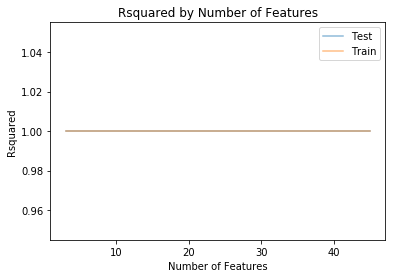

In [74]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [75]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)])
print(r2_scores_train[np.argmax(r2_scores_test)]) 


3
1.0
1.0


## Section 5: Evaluate the Results

### Question 1
#### Analyse
#### Visualise
#### Brief explanation for visualisation

This is the section where you answer your business question using statistical analysis or modeling technique
At the end of each question's analysis, provide a conclusion in brief

In [76]:
print("The number of salaries in the original dataframe is " + str(np.sum(df.StackOverflowSatisfaction.notnull()))) 
print("The number of salaries predicted using our model is " + str(len(y_test_preds)))
print("This is bad because we only predicted " + str((len(y_test_preds))/np.sum(df.StackOverflowSatisfaction.notnull())) + " of the salaries in the dataset.")

The number of salaries in the original dataframe is 13452
The number of salaries predicted using our model is 4036
This is bad because we only predicted 0.300029735355 of the salaries in the dataset.
